In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# dataset showing CHina's GDP from 1960 - 2014

!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head()

2020-06-27 22:22:05 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [31]:
# Types of non-linear graphs

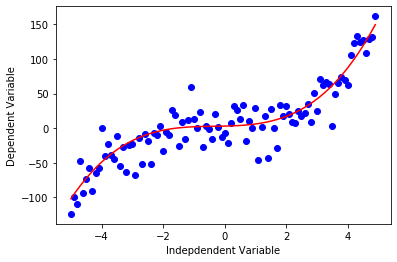

In [32]:
# Cubic function graph
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

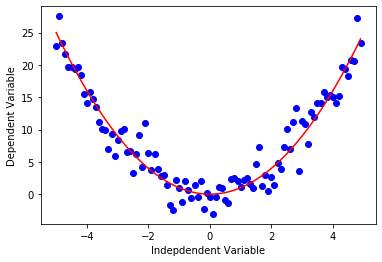

In [33]:
# Quadratic function graph
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


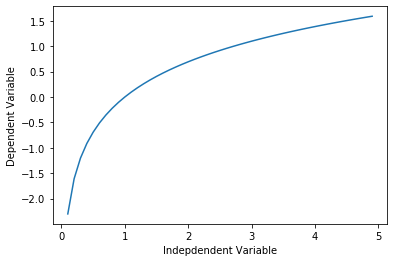

In [34]:
# Logarithmic function grraph
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

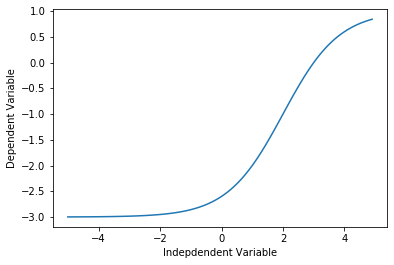

In [35]:
# Sigmoidal/Logistic function graph

X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

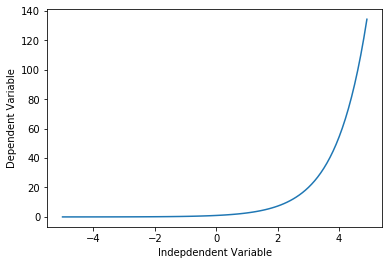

In [36]:
# Exponential function graph
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]
[5.91841165e+10 4.95570502e+10 4.66851785e+10 5.00973033e+10
 5.90622549e+10 6.97091531e+10 7.58794348e+10 7.20570286e+10
 6.99934979e+10 7.87188205e+10 9.15062113e+10 9.85620238e+10
 1.12159814e+11 1.36769878e+11 1.42254742e+11 1.61162492e+11
 1.51627687e+11 1.72349014e+11 1.48382112e+11 1.76856525e+11
 1.89649992e+11 1.94369049e+11 2.03549627e+11 2.28950201e+11
 2.58082147e+11 3.07479586e+11 2.98805793e+11 2.71349773e+11
 3.10722214e+11 3.45957486e+11 3.58973230e+11 3.81454704e+11
 4.24934066e+11 4.42874596e+11 5.62261130e+11 7.32032045e+11
 8.60844098e+11 9.58159425e+11 1.02527690e+12 1.08944711e+12
 1.20526068e+12 1.33223472e+12 1.46190649e+12 1.64992872e+12
 1.94174560e+12 2.26859890e+12 2.72978403e+12 3.5

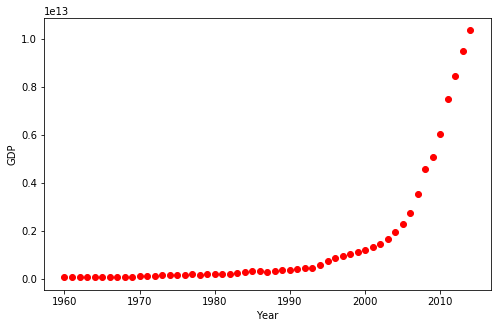

In [37]:
# data needed for plotting
x_data = df["Year"].values
y_data = df["Value"].values

print(x_data)
print(y_data)

# plot graph to see linear relationship
plt.figure(figsize=(8, 5))
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

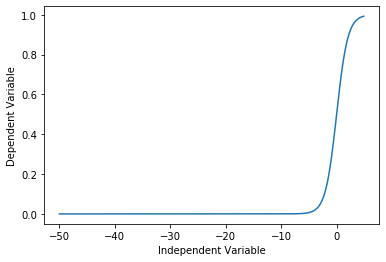

In [38]:
# Choosing a model in this case a logistic model
X = np.arange(-50, 5.0, 0.1)
Y = 1.0/(1.0 + np.exp(-X))

plt.plot(X, Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

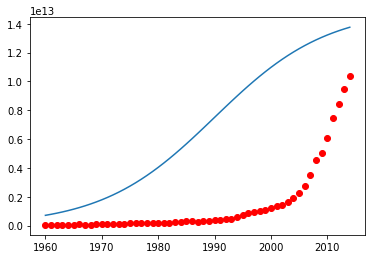

In [39]:
# Building the modeal
def sigmoid(x, Beta_1, Beta_2):
    y = 1/(1 + np.exp(-Beta_1 * (x- Beta_2)))
    return y

beta_1 = 0.10
beta_2 = 1990.0

# Logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# plot initail prediction against datapoints
plt.plot(x_data, Y_pred * 15000000000000)
plt.plot(x_data, y_data, 'ro')


In [41]:
# noraml dataset to find the best parameters for our model
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [46]:
# Use curve_fit o find the best parametrs 
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.447527, beta_2 = 0.997207


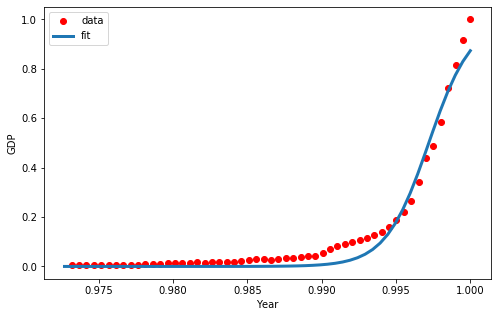

In [47]:
# plot the resulting regression model

x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize = (8, 5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label = 'data')
plt.plot(x,y, linewidth = 3.0, label ='fit')
plt.legend(loc = 'best')
plt.ylabel('GDP')
plt.xlabel('Year')

plt.show()

In [49]:
# Model accuracy
from sklearn.metrics import r2_score
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))


print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.95
